# 实例13.1-建立Sequentail模型

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()

X_train,X_test=tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32)
y_train,y_test=tf.cast(train_y,tf.int16),tf.cast(test_y,tf.int16)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

model.fit(X_train,y_train,batch_size=64,epochs=5,validation_split=0.2)

model.evaluate(X_test,y_test,verbose=2)

model.save_weights("mnist_weights.h5")

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3399 - sparse_categorical_accuracy: 0.9053 - val_loss: 0.1785 - val_sparse_categorical_accuracy: 0.9495
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1556 - sparse_categorical_accuracy: 0.9549 - val_loss: 0.1319 - val_sparse_categorical_accuracy: 0.9625
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1066 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.1104 - val_sparse_categorical_accuracy: 0.9678
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0977 - val_sparse_categorical_accuracy: 0.9708
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0648 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0894 - val_sparse_categorical_accuracy: 0.9725
313/313 - 0s - loss: 0.0927 - sparse_categorical_accuracy: 0.9720 - 349ms/epoch - 1ms/step


1/1 [==============================] - 0s 16ms/step


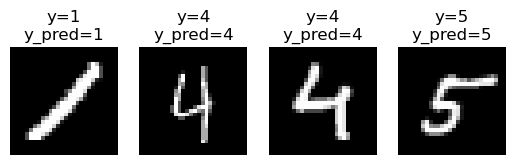

In [5]:
for i in range(4):
    num=np.random.randint(1,10000)
    
    plt.subplot(1,4,i+1)
    plt.axis("off")
    plt.imshow(test_x[num],cmap="gray")
    y_pred=np.argmax(model.predict(X_test[num:num+1]))
    plt.title("y="+str(test_y[num])+"\ny_pred="+str(y_pred))
    
plt.show()

In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

model.load_weights("mnist_weights.h5")

model.evaluate(X_test,y_test,verbose=2)

model.save("mnist_model.h5")

313/313 - 0s - loss: 0.0927 - sparse_categorical_accuracy: 0.9720 - 398ms/epoch - 1ms/step
